#                   ECE 558: Digital Imaging Systems PROJECT 02

##                                      NAME: VIKRAM PANDE

##                                      UNITY_ID: vspande
 

## PROBLEM 1: CONVOLUTION FROM SCRATCH
## PROBLEM 1A

In [1]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import math

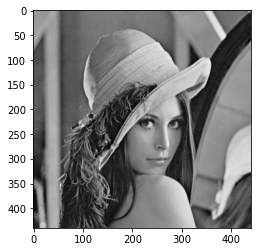

In [2]:
# Reading the Image
img = cv2.imread('lena.png')
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img_gray,'gray')
plt.show()

### GETTING ALL THE KERNELS 

In [3]:
"""
Defining all the kernels 
"""
box = np.ones((3,3), np.float32)/9  #Box Filter of 3x3
foh = np.array([[-1,1]]) #Horizontal First Order Derivative
fov = np.array([[-1],[1]]) #Vertical First Order Derivative
prewitt = np.array([[-1,0,1],[-1,0,1],[-1,0,1]]) #Prewitt Mx
prewitt_t = np.array([[1,1,1],[0,0,0],[-1,-1,1]]) #Prewitt My
sobel = np.array([[-1,0,1],[-2,0,2],[-1,0,1]]) #Sobel Mx
sobel_t = np.array([[1,2,1],[0,0,0],[-1,-2,-1]]) #Sobel My
robert = np.array([[0,1],[-1,0]]) #Roberts Mx
robert_t = np.array([[1,0],[0,-1]]) #Roberts My

### FUNCTION TO GET PADDING

In [4]:
def add_padding(f: np.array,wr: int,wc: int, pad: int) -> np.array:
    """
    Adds padding to the Input Matrix
    Args:
    1) Input Image -> f
    2) Kernel Size -> w
    3) Padding type -> 0 for clip/zero-padding (Default)
                       1 for wrap padding
                       2 for copy edge
                       3 for reflect across edge
    Returns:
    Padded Matrix (np.array)
    """
    #wr = w
    #wc = w
    #fr, fc = f.shape
    fr = f.shape[0]
    fc = f.shape[1]
    #Padding around the edges according to size of Kernel
    topmost= int(math.ceil((wr-1)/2))
    downmost = int(math.floor((wr-1)/2))
    leftmost = int(math.ceil((wc-1)/2))
    rightmost = int(math.floor((wc-1)/2))
    
    #Zero Padding
    extended_padding = (fr + topmost + downmost, fc + leftmost + rightmost)
    padded_image = np.zeros(extended_padding)
    #Fitting original image into zero padded matrix 
    padded_image[topmost : topmost + fr, leftmost : leftmost + fc] = f
    
    #Warp
    if pad == 1:
        if topmost != 0:
            padded_image[0:topmost,:]=padded_image[-1*(topmost + downmost):topmost+f.shape[0],:]
        if downmost != 0:
            padded_image[-1*(downmost) : , : ] = padded_image[topmost : topmost + downmost, :]
        if rightmost != 0:
            padded_image[ : ,-1*(rightmost) : ] = padded_image[ : ,leftmost : leftmost + rightmost]
        if leftmost != 0:
            padded_image[ : ,0 : leftmost] = padded_image[ : ,-1*(leftmost+rightmost) : leftmost + f.shape[1]]
            
    #Copy Edge        
    elif pad == 2:
        if topmost != 0: 
            padded_image[0 : topmost, : ] = padded_image[[topmost], : ]
        if downmost != 0: 
            padded_image[-1*(downmost): , : ] = padded_image[[-1*downmost-1], :]
        if rightmost != 0: 
            padded_image[ : ,-1*(rightmost) : ] = padded_image[ : ,[-1*(rightmost)-1]]
        if leftmost != 0: 
            padded_image[ : ,0 : leftmost] = padded_image[ : ,[leftmost]]      
    #        
    elif pad == 3:
        if topmost != 0:
            padded_image[0 : topmost, : ] = np.flip(padded_image[topmost : 2*topmost, :],axis = 0)
        if downmost != 0:
            padded_image[-1*(downmost) : , : ] = np.flip(padded_image[-2*(downmost) : -1*(downmost), : ], axis = 0)
        if rightmost != 0:
            padded_image[ : ,-1*(rightmost) : ] = np.flip(padded_image[ : , -2*(rightmost) : -1*(rightmost)], axis = 1)
        if leftmost != 0:
            padded_image[ : ,0 : leftmost] = np.flip(padded_image[ : ,leftmost : 2* leftmost],axis = 1)
            
    return padded_image

### TESTING THE PADDING TYPES

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


Text(0.5, 1.0, 'ZERO PADDING')

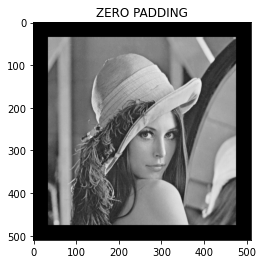

In [5]:
k = 71
zero_padding = add_padding(img_gray,71,71, 0)
print(zero_padding)
plt.imshow(zero_padding,'gray')
plt.title('ZERO PADDING')

[[ 99. 103. 107. ... 156. 161. 164.]
 [ 96.  98. 107. ... 155. 161. 165.]
 [ 97. 103. 109. ... 155. 159. 163.]
 ...
 [123. 108.  93. ... 160. 161. 158.]
 [109.  94.  70. ... 162. 161. 158.]
 [ 92.  72.  52. ... 160. 158. 159.]]


Text(0.5, 1.0, 'WARP PADDING')

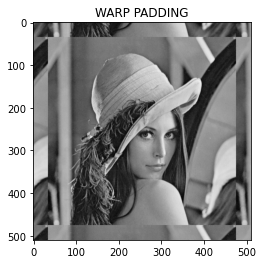

In [6]:
warp_padding = add_padding(img_gray,71,k, 1)
print(warp_padding)
plt.imshow(warp_padding,'gray')
plt.title('WARP PADDING')

[[162. 162. 162. ... 131. 131. 131.]
 [162. 162. 162. ... 131. 131. 131.]
 [162. 162. 162. ... 131. 131. 131.]
 ...
 [ 44.  44.  44. ... 108. 108. 108.]
 [ 44.  44.  44. ... 108. 108. 108.]
 [ 44.  44.  44. ... 108. 108. 108.]]


Text(0.5, 1.0, 'COPY EDGE PADDING')

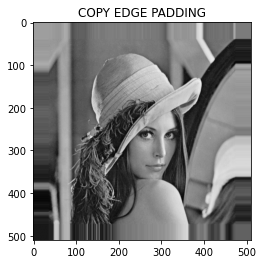

In [7]:
edge_padding = add_padding(img_gray,71,71, 2)
print(edge_padding)
plt.imshow(edge_padding,'gray')
plt.title('COPY EDGE PADDING')

[[159. 158. 160. ...  52.  72.  92.]
 [158. 161. 162. ...  70.  94. 109.]
 [158. 161. 160. ...  93. 108. 123.]
 ...
 [163. 159. 155. ... 109. 103.  97.]
 [165. 161. 155. ... 107.  98.  96.]
 [164. 161. 156. ... 107. 103.  99.]]


Text(0.5, 1.0, 'REFLECT ACROSS EDGE PADDING')

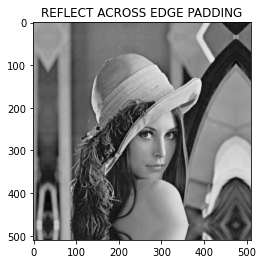

In [8]:
reflect_padding = add_padding(img_gray,k,k, 3)
print(reflect_padding)
plt.imshow(reflect_padding,'gray')
plt.title('REFLECT ACROSS EDGE PADDING')

### CONVOLUTION FUNCTION

In [9]:
# CONVOLUTION FUNCTION
def conv2(f: np.array,w: np.array,pad: int):
    """
    Adds padding to the Input Matrix
    Args:
    1) Input Image -> f
    2) Kernel -> w
    3) Padding type -> 0 for clip/zero-padding (Default)
                       1 for wrap padding
                       2 for copy edge
                       3 for reflect across edge
    Returns:
    Convoluted Image (np.array)
    
    Gray Image is a two component Image. In case of three component images i.e. RGB, we need to split each component 
    and apply convolution seperately. Once the convolution is applied, we will merge the components together and return
    the convoluted RGB image.
    """    
    # FOR GRAY IMAGES
    if len(f.shape) < 3:
        f_padded = add_padding(f,w.shape[0],w.shape[1], pad)
        convolved_matrix = np.zeros((f.shape[0], f.shape[1]))
        for r in range(convolved_matrix.shape[0]):
            for c in range(convolved_matrix.shape[1]):
                convolved_matrix[r][c]= np.sum(np.multiply(f_padded[r:r+w.shape[0],c:c+w.shape[1]],w))
            
    # FOR RGB IMAGES
    elif len(f.shape) == 3:
        
        b,g,r = cv2.split(f)
        
        fb_padded = add_padding(b, w.shape[0], w.shape[1], pad) 
        fg_padded = add_padding(g, w.shape[0], w.shape[1], pad) 
        fr_padded = add_padding(r, w.shape[0], w.shape[1], pad)
        
        convolved_bmatrix = np.zeros((b.shape[0],b.shape[1]))
        convolved_gmatrix = np.zeros((g.shape[0],g.shape[1]))
        convolved_rmatrix = np.zeros((r.shape[0],r.shape[1]))
        
        for r in range(convolved_bmatrix.shape[0]):
            
            for c in range(convolved_bmatrix.shape[1]):
                convolved_bmatrix[r][c]= np.sum(np.multiply(fb_padded[r:r+w.shape[0],c:c+w.shape[1]],w))
                convolved_gmatrix[r][c]= np.sum(np.multiply(fg_padded[r:r+w.shape[0],c:c+w.shape[1]],w))
                convolved_rmatrix[r][c]= np.sum(np.multiply(fr_padded[r:r+w.shape[0],c:c+w.shape[1]],w))
                
        convolved_matrix = cv2.merge((convolved_bmatrix,convolved_gmatrix,convolved_rmatrix)).astype(np.uint8)
    else:
        print("\nInput out of bounds")
            
    return convolved_matrix

### TESTCASES

#### LENA IMAGE - 9 FILTERS - Zero Padding

[[ 72.00000054 107.77777858 107.77777858 ... 111.77777861 102.88888966
   64.66666715]
 [108.0000008  161.66666787 161.66666787 ... 167.22222347 153.88889004
   96.66666739]
 [108.0000008  161.77777898 161.77777898 ... 168.11111236 155.22222338
   97.66666739]
 ...
 [ 31.22222245  47.66666702  49.55555592 ...  99.66666741  99.77777852
   66.22222272]
 [ 29.88888911  47.11111146  50.11111148 ... 102.3333341  103.00000077
   68.8888894 ]
 [ 20.11111126  31.88888913  34.00000025 ...  68.66666718  69.44444496
   46.88888924]]


Text(0.5, 1.0, 'Convoluted Image with Box Filter')

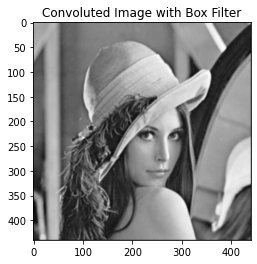

In [10]:
# Convoluted Image with Box Filter
box_result = conv2(img_gray, box, 0)
print(box_result)
plt.imshow(box_result,'gray')
plt.title('Convoluted Image with Box Filter')

[[162.   0.  -1. ...   1. -12. -29.]
 [162.   0.  -1. ...   1. -12. -29.]
 [162.   0.  -1. ...   1. -13. -28.]
 ...
 [ 43.   2.   4. ...   6.  -3.  -4.]
 [ 43.   4.   5. ...   0.   2.   1.]
 [ 44.   3.   7. ...  -3.   4.   3.]]


Text(0.5, 1.0, 'Convoluted Image with Horizontal First Order Derivative Filter')

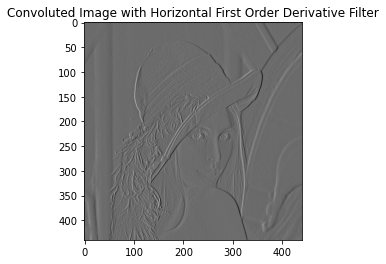

In [11]:
# Convoluted Image with Horizontal First Order Derivative Filter
foh_result = conv2(img_gray, foh, 0)
print(foh_result)
plt.imshow(foh_result,'gray')
plt.title('Convoluted Image with Horizontal First Order Derivative Filter')

[[162. 162. 161. ... 172. 160. 131.]
 [  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...  -1.  -2.  -1.]
 ...
 [ -9.  -6.   2. ...   8.   4.   5.]
 [  0.   2.   3. ...  -2.   3.   8.]
 [  1.   0.   2. ...  -1.   1.   3.]]


Text(0.5, 1.0, 'Convoluted Image with Vertical First Order Derivative Filter')

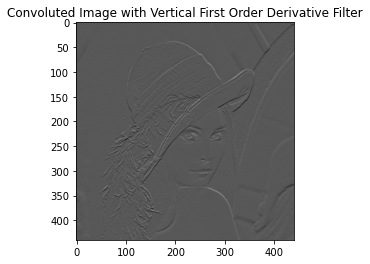

In [12]:
# Convoluted Image with Vertical First Order Derivative Filter
fov_result = conv2(img_gray, fov, 0)
print(fov_result)
plt.imshow(fov_result,'gray')
plt.title('Convoluted Image with Vertical First Order Derivative Filter')

[[ 324.   -2.    0. ...  -22.  -82. -320.]
 [ 486.   -3.    0. ...  -34. -123. -478.]
 [ 486.   -2.    0. ...  -31. -121. -482.]
 ...
 [ 143.   10.   12. ...    9.   -8. -302.]
 [ 139.   25.   18. ...    6.    3. -310.]
 [  94.   19.   12. ...    3.   10. -209.]]


Text(0.5, 1.0, 'Convoluted Image with Prewitt Mx Filter')

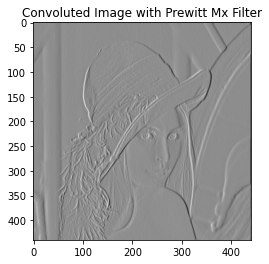

In [13]:
# Convoluted Image with Prewitt Mx Filter
pmx_result = conv2(img_gray, prewitt, 0)
print(pmx_result)
plt.imshow(pmx_result,'gray')
plt.title('Convoluted Image with Prewitt Mx Filter')

[[   0. -163. -161. ... -183. -201. -291.]
 [ 324.  322.  324. ...  320.  264.    3.]
 [ 324.  323.  323. ...  320.  260.   -9.]
 ...
 [ 107.  112.  103. ...  186.  184.  -20.]
 [  91.  100.   97. ...  203.  204.  -15.]
 [  90.  142.  152. ...  308.  311.  209.]]


Text(0.5, 1.0, 'Convoluted Image with Prewitt My Filter')

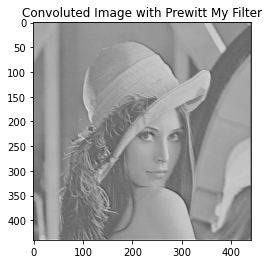

In [14]:
# Convoluted Image with Prewitt My Filter
pmy_result = conv2(img_gray, prewitt_t, 0)
print(pmy_result)
plt.imshow(pmy_result,'gray')
plt.title('Convoluted Image with Prewitt My Filter')

[[ 486.   -3.    0. ...  -33. -123. -480.]
 [ 648.   -4.    0. ...  -45. -164. -638.]
 [ 648.   -3.    0. ...  -43. -162. -640.]
 ...
 [ 188.   16.   18. ...   12.  -15. -403.]
 [ 186.   34.   24. ...    8.    6. -414.]
 [ 141.   29.   18. ...    4.   17. -314.]]


Text(0.5, 1.0, 'Convoluted Image with Sobel Mx Filter')

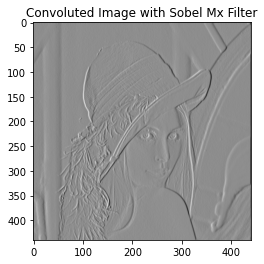

In [15]:
# Convoluted Image with Sobel Mx Filter
smx_result = conv2(img_gray, sobel, 0)
print(smx_result)
plt.imshow(smx_result,'gray')
plt.title('Convoluted Image with Sobel Mx Filter')

[[-486. -647. -646. ... -675. -623. -422.]
 [   0.    0.    0. ...    5.    6.    4.]
 [   0.   -1.   -2. ...  -11.  -16.  -14.]
 ...
 [  22.   12.   -8. ...  -28.  -33.  -33.]
 [  -4.  -10.  -14. ...   -4.  -16.  -26.]
 [ 133.  189.  204. ...  410.  415.  314.]]


Text(0.5, 1.0, 'Convoluted Image with Sobel My Filter')

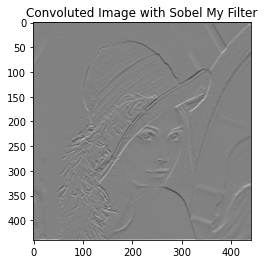

In [16]:
# Convoluted Image with Sobel My Filter
smy_result = conv2(img_gray, sobel_t, 0)
print(smy_result)
plt.imshow(smy_result,'gray')
plt.title('Convoluted Image with Sobel My Filter')

[[   0. -162. -162. ... -171. -172. -160.]
 [ 162.    0.   -1. ...    1.  -12.  -29.]
 [ 162.    0.   -1. ...    2.  -11.  -27.]
 ...
 [  52.    8.    2. ...   -2.   -7.   -9.]
 [  43.    2.    2. ...    2.   -1.   -7.]
 [  43.    3.    5. ...   -2.    3.    0.]]


Text(0.5, 1.0, 'Convoluted Image with Roberts Mx Filter')

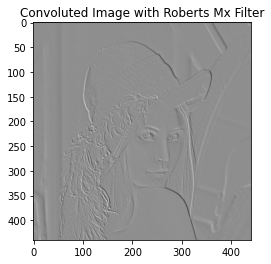

In [17]:
# Convoluted Image with Robert Mx Filter
rmx_result = conv2(img_gray, robert, 0)
print(rmx_result)
plt.imshow(rmx_result,'gray')
plt.title('Convoluted Image with Roberts Mx Filter')

[[-162. -162. -161. ... -172. -160. -131.]
 [-162.    0.    1. ...   -1.   12.   29.]
 [-162.    0.    1. ...    0.   14.   30.]
 ...
 [ -43.    7.    2. ...  -11.   -5.    0.]
 [ -43.   -4.   -7. ...   -4.    0.   -4.]
 [ -44.   -4.   -7. ...    1.   -3.   -4.]]


Text(0.5, 1.0, 'Convoluted Image with Roberts My Filter')

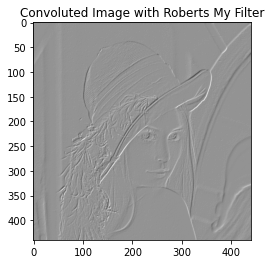

In [18]:
# Convoluted Image with Robert Mx Filter
rmy_result = conv2(img_gray, robert_t, 0)
print(rmy_result)
plt.imshow(rmy_result,'gray')
plt.title('Convoluted Image with Roberts My Filter')

#### Wolves Image - 3 Kernels - 3 Paddings - 1 Color

In [19]:
wolves = cv2.imread('wolves.png')
wolves_gray = cv2.cvtColor(wolves, cv2.COLOR_BGR2GRAY)
print(len(wolves.shape))

3


[[244. 297. 291. ...  77.  92. 162.]
 [ 17.  11.  62. ...  34.  52.  34.]
 [-38.  16.  73. ...  70.  57. -47.]
 ...
 [211. 231. 227. ...  59.  55. 192.]
 [223. 240. 240. ...  69.  69. 208.]
 [237. 317. 325. ... 115. 106. 166.]]


Text(0.5, 1.0, 'Convoluted Wolves Image with Prewitt My Filter')

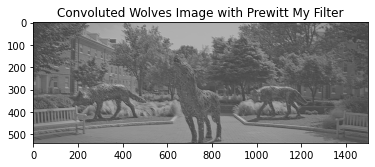

In [20]:
# Convoluted Image with Prewitt My Filter
pwmy_result = conv2(wolves_gray, prewitt_t, 1)
print(pwmy_result)
plt.imshow(pwmy_result,'gray')
plt.title('Convoluted Wolves Image with Prewitt My Filter')

[[ 19.   7.  18. ...  16.  29.  35.]
 [ 10.  11.  62. ...  34.  52.  45.]
 [ -3.  16.  73. ...  70.  57.   2.]
 ...
 [233. 231. 227. ...  59.  55.  50.]
 [239. 240. 240. ...  69.  69.  68.]
 [212. 213. 212. ...  94.  95.  95.]]


Text(0.5, 1.0, 'Convoluted Wolves Image with Box Filter')

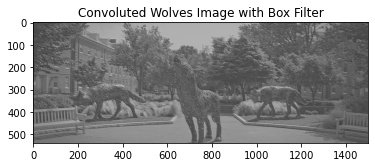

In [21]:
# Convoluted Image with Box Filter
boxw_result = conv2(wolves_gray, prewitt_t, 2)
print(boxw_result)
plt.imshow(boxw_result,'gray')
plt.title('Convoluted Wolves Image with Box Filter')

### COVOLUTION OF COLOR IMAGE

Text(0.5, 1.0, 'Convoluted Wolves (COLOR) Image with Box Filter')

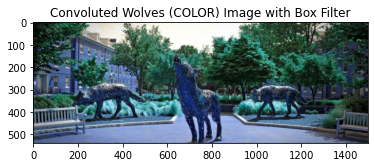

In [22]:
# Convoluted Color Image with Sobel Mx Filter
bc_result = conv2(wolves, box, 0)
#print(swmx_result)
plt.imshow(bc_result,'gray')
plt.title('Convoluted Wolves (COLOR) Image with Box Filter')

# Problem 1B

In [23]:
unit_impulse = np.zeros((1024,1024))
unit_impulse[512,512] = 1
print(unit_impulse[509:516,509:516])

[[0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]]


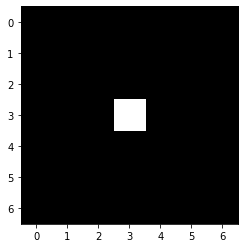

In [24]:
# Visualising
plt.imshow(unit_impulse[509:516,509:516], cmap = 'gray')
plt.show()

In [25]:
#BOX FILTER
kernel1 = 1/16*np.ones((4,4))
impulse_conv = conv2(unit_impulse, kernel1,1)
print(impulse_conv[510:516,510:516])

[[0.     0.     0.     0.     0.     0.    ]
 [0.     0.0625 0.0625 0.0625 0.0625 0.    ]
 [0.     0.0625 0.0625 0.0625 0.0625 0.    ]
 [0.     0.0625 0.0625 0.0625 0.0625 0.    ]
 [0.     0.0625 0.0625 0.0625 0.0625 0.    ]
 [0.     0.     0.     0.     0.     0.    ]]


In [26]:
kernel2 = 1/9*np.ones((3,3))
impulse_conv = conv2(unit_impulse, kernel2,0)
print(impulse_conv[510:515,510:515])

[[0.         0.         0.         0.         0.        ]
 [0.         0.11111111 0.11111111 0.11111111 0.        ]
 [0.         0.11111111 0.11111111 0.11111111 0.        ]
 [0.         0.11111111 0.11111111 0.11111111 0.        ]
 [0.         0.         0.         0.         0.        ]]


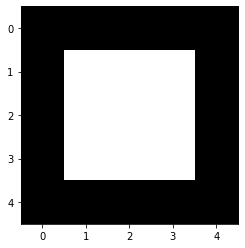

In [27]:
#VIsualising
plt.imshow(impulse_conv[510:515,510:515],'gray')
plt.show()

#### Explanation - As we can see the convolution is working, the impulse i.e. the center is changing with the values of the Kernel applied. 